In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [4]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [1754]:
t = 100.0
tt = 100.0
tstep = 0.001
trange = range(0.0, t, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [1755]:
tr[end]

3-element SVector{3, Float64} with indices SOneTo(3):
 0.5016565343933567
 0.8843561571148351
 0.3465491964077342

## Диапазон [-0.09635; -0.097]
## Начальные условия в единственном экземпляре 

In [1812]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375

const xthr = 0.9; const ythr = 0.4 # ythr was change

α = 0.0900; U0 = 0.40; ΔU0 = 0.330; I0 =  -0.09655 # -0.09639 # -0.096532

-0.09655

In [1813]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = SA[0.5016565343933567
 0.8843561571148351
 0.3465491964077342]

3-element SVector{3, Float64} with indices SOneTo(3):
 0.5016565343933567
 0.8843561571148351
 0.3465491964077342

Cycle

parameters

const τ =  0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375
const xthr = 0.9; const ythr = 0.4 # ythr was change
α = 0.850; U0 = 0.3; ΔU0 = 0.305; I0 = -1.0

u0 [0.6388778225673112, 0.9509649024501307, 0.4624513204009227]

In [1814]:
ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [0.501657, 0.884356, 0.346549]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.09, 0.013, 0.15, 1.8, 3.07, …, 0.4, 0.33, 0.4375, -0.09655]

In [1815]:
tr = trajectory(ds, t, Δt = tstep; Ttr = tt, diffeq = integ_set);

In [1816]:
tr

3-dimensional Dataset{Float64} with 100001 points
 14.6911    0.830408  0.397774
 15.156     0.824696  0.397636
 15.6222    0.818866  0.397491
 16.0886    0.812922  0.397339
 16.5542    0.80687   0.39718
 17.0177    0.800716  0.397015
 17.4779    0.794467  0.396844
 17.9337    0.788129  0.396669
 18.3839    0.78171   0.396488
 18.827     0.775218  0.396303
 19.2621    0.768662  0.396115
 19.6877    0.762048  0.395922
 20.1028    0.755387  0.395727
  ⋮                   
  0.384986  0.910919  0.347639
  0.383057  0.911363  0.347689
  0.381124  0.911806  0.347739
  0.379188  0.912246  0.347791
  0.37725   0.912683  0.347844
  0.375307  0.913119  0.347897
  0.373362  0.913552  0.347952
  0.371412  0.913983  0.348007
  0.369459  0.914412  0.348063
  0.367501  0.914838  0.348121
  0.365539  0.915263  0.348179
  0.363573  0.915685  0.348237

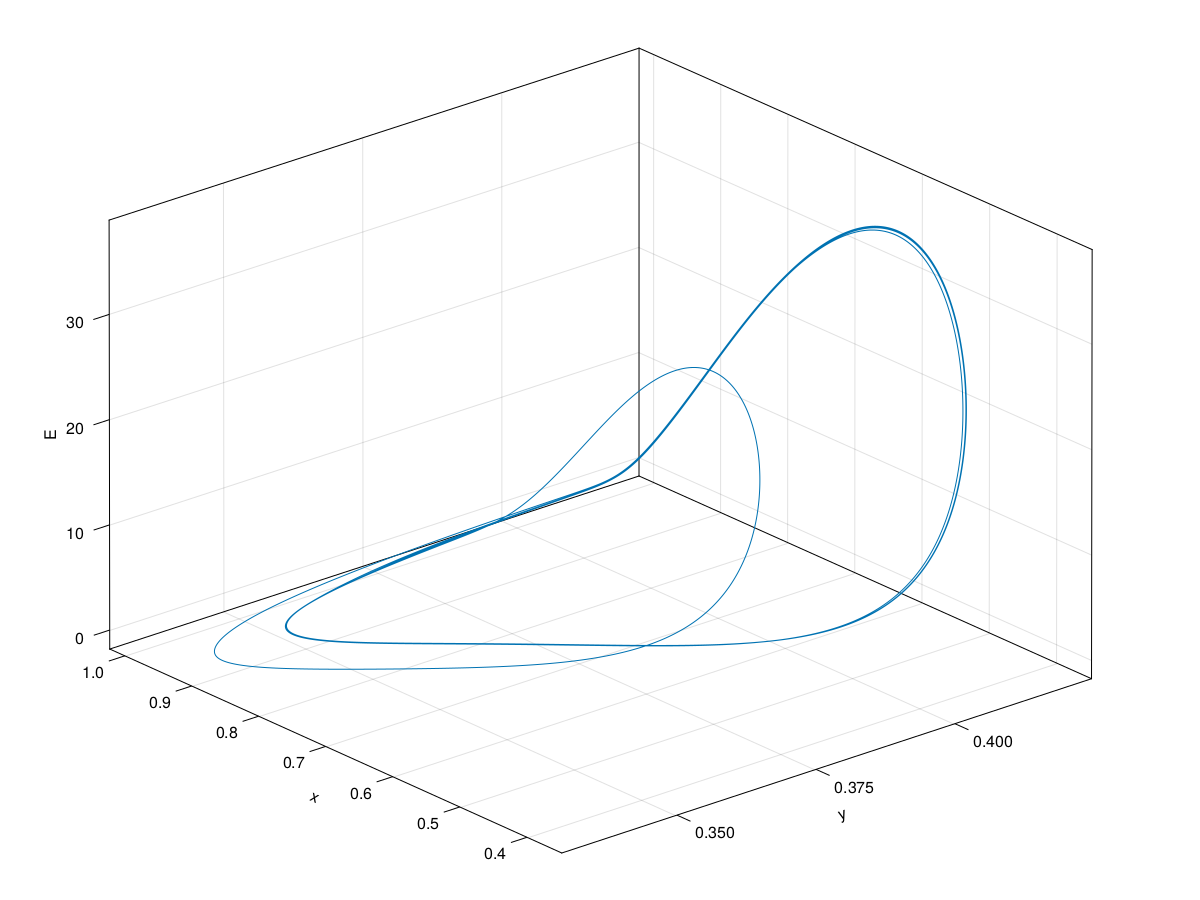

In [1817]:
f = Figure(resolution = (1200, 900))
axis3 = Axis3(f[1, 1], xlabel = "y", ylabel = "x", zlabel = "E")
lines!(axis3, tr[:, 3], tr[:, 2], tr[:, 1], linewidth = 1.0)
f

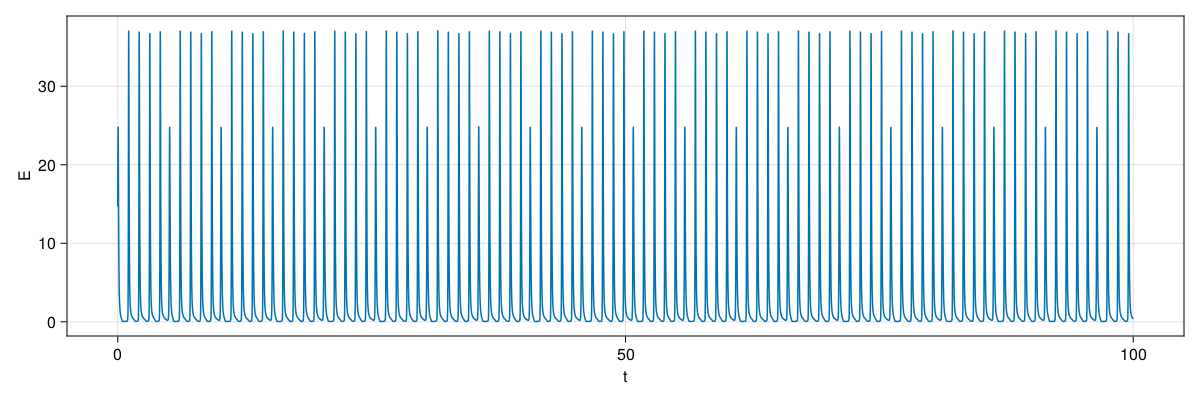

In [1820]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1, 1], xlabel = "t", ylabel = "E")
lines!(axis, trange[:], tr[:, 1])
f

In [1819]:
ds

3-dimensional continuous dynamical system
 state:       [0.501657, 0.884356, 0.346549]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.09, 0.013, 0.15, 1.8, 3.07, …, 0.4, 0.33, 0.4375, -0.09655]

In [1772]:
[-0.09635; -0.097]

2-element Vector{Float64}:
 -0.09635
 -0.097

In [1467]:
range_I0 = range(-0.0963, -0.097, length = 50)

-0.0963:-1.4285714285714285e-5:-0.097

In [1477]:
initial_condition = SA[0.10760348063006954
 0.9625393113663498
 0.3658649870940249]

3-element SVector{3, Float64} with indices SOneTo(3):
 0.10760348063006954
 0.9625393113663498
 0.3658649870940249